In [25]:
import pandas as pd

In [26]:
employee=pd.read_csv('/content/drive/MyDrive/Dataset/employee_data.csv')

In [27]:
employee.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [28]:
employee.shape

(400, 5)

In [29]:
employee.nunique()

,0
ID,400
Gender,2
Experience (Years),21
Position,11
Salary,400


Statistical Information

In [30]:
employee.describe()

,ID,Experience (Years),Salary
count,400.000000,400.000000,400.00000
mean,200.500000,9.670000,131701.19750
std,115.614301,6.101571,43351.50899
min,1.000000,0.000000,43643.00000
25%,100.750000,4.000000,100484.75000
50%,200.500000,10.000000,128561.50000
75%,300.250000,15.000000,157735.00000
max,400.000000,20.000000,269950.00000


In [31]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


Data Analysis on Categorical variable

In [32]:
import seaborn as sns

<Axes: xlabel='count', ylabel='Gender'>

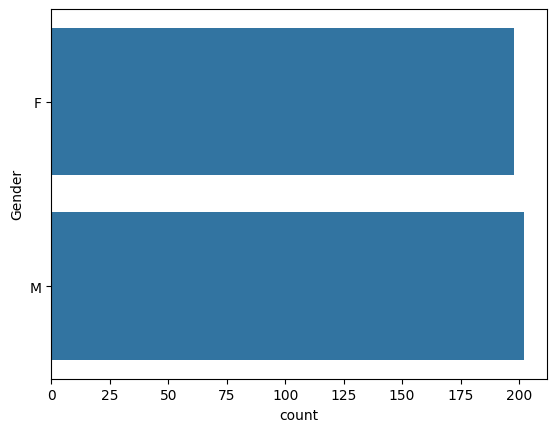

In [33]:
sns.countplot(employee['Gender'])

<Axes: xlabel='count', ylabel='Position'>

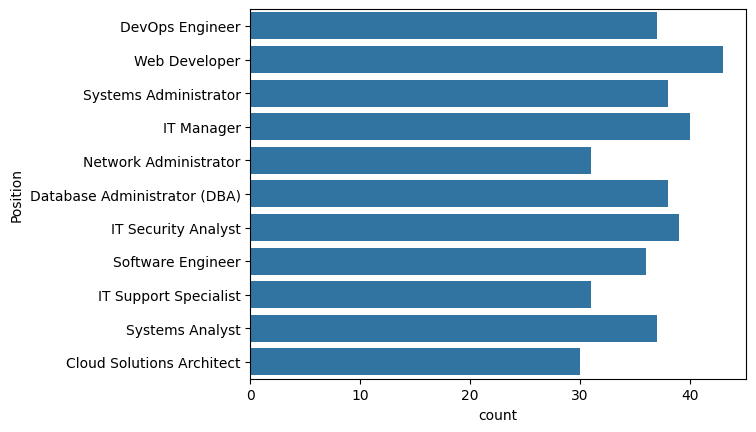

In [34]:
sns.countplot(employee['Position'])

Data Analysis on Numerical Data


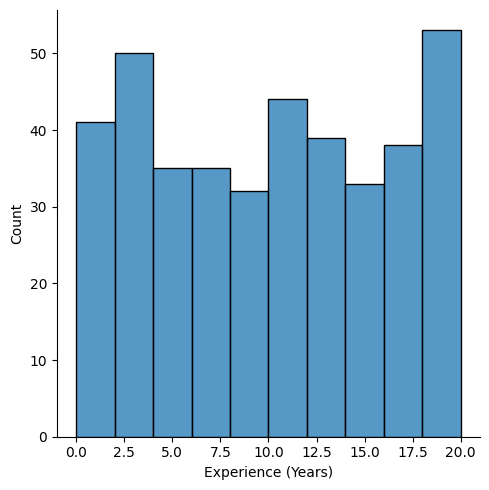

In [35]:
sns.displot(employee['Experience (Years)'],kind="hist")

Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
cols=['Gender','Position']
le=LabelEncoder()
for col in cols:
  employee[col]=le.fit_transform(employee[col])
employee.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,0,4,2,109976
1,2,1,6,2,120088
2,3,1,17,10,181301
3,4,1,7,8,77530
4,5,0,13,8,152397


In [38]:
print(employee.columns)

Index(['ID', 'Gender', 'Experience (Years)', 'Position', 'Salary'], dtype='object')


In [39]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ID                  400 non-null    int64
 1   Gender              400 non-null    int64
 2   Experience (Years)  400 non-null    int64
 3   Position            400 non-null    int64
 4   Salary              400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [40]:
employee['Gender'].value_counts()

,count
Gender,
1,202
0,198


In [41]:
employee['Salary'].value_counts()

,count
Salary,
109976,1
92927,1
132311,1
161927,1
79944,1
...,...
155017,1
95631,1
120142,1


In [48]:
x=employee.drop(['ID','Salary'],axis=1)
y=employee['Salary']

In [49]:
x.shape,y.shape

((400, 3), (400,))

In [50]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [72]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)


In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [79]:
mse=mean_squared_error(y_test,pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 739592077.034876
